In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings("ignore")

In [11]:
import matplotlib as mpl

mpl.rcParams['text.color'] = 'w'
mpl.rcParams['xtick.color'] = 'w'
mpl.rcParams['ytick.color'] = 'w'
mpl.rcParams['axes.labelcolor'] = 'w'

In [12]:
# Read in data
data_red = pd.read_csv("winequality-red.csv", sep=";")
data_red.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
# Create a custom categorical variable based on pH values
# pH < 3: acidic
# 3 <= pH < 3.3: white wine range
# 3.3 <= pH < 3.6: ideal red
# pH >= 3.6: too high

data_red['pH range'] = data_red['pH']
data_red['pH range'][data_red['pH']<3] = 'acidic'
data_red['pH range'][(data_red['pH']>=3) & (data_red['pH']<3.3)] = 'white wine range'
data_red['pH range'][(data_red['pH']>=3.3) & (data_red['pH']<3.6)] = 'ideal red'
data_red['pH range'][data_red['pH']>=3.6] = 'too high'
data_red['pH range'].value_counts()

ideal red           818
white wine range    697
too high             55
acidic               29
Name: pH range, dtype: int64

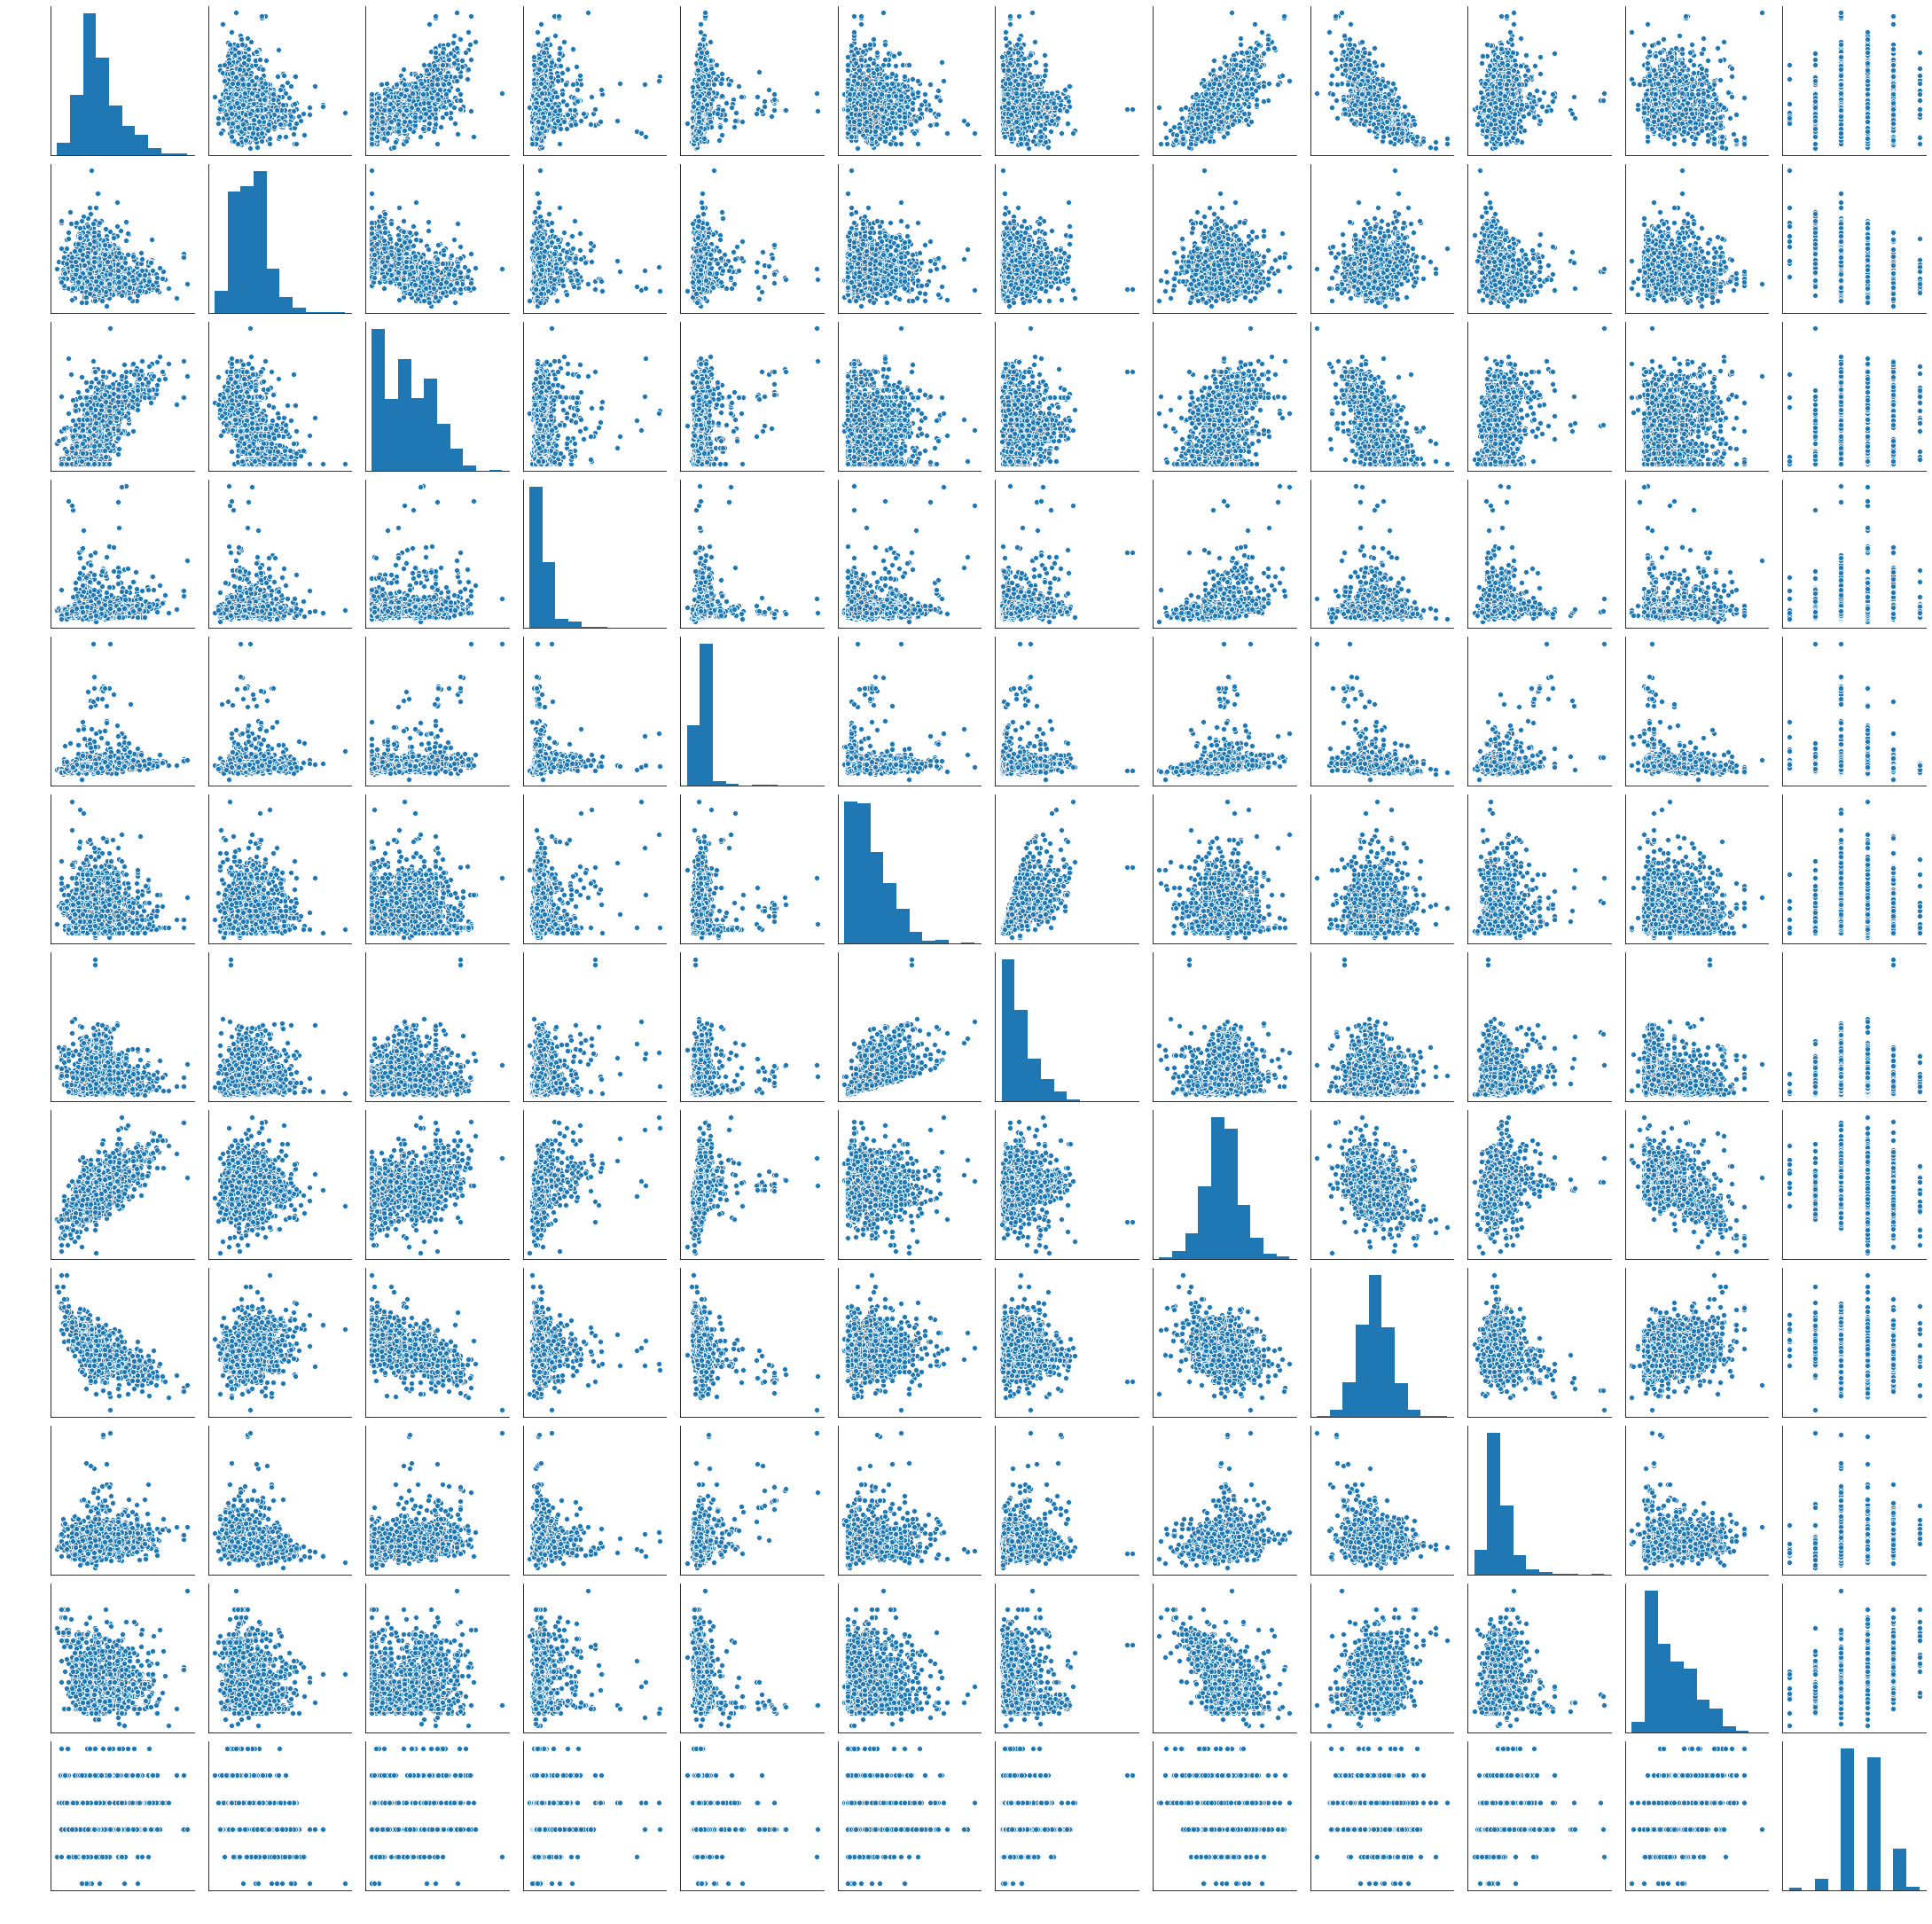

In [14]:
# Create scatter plots
sns.pairplot(data_red, kind='scatter')

<AxesSubplot:>

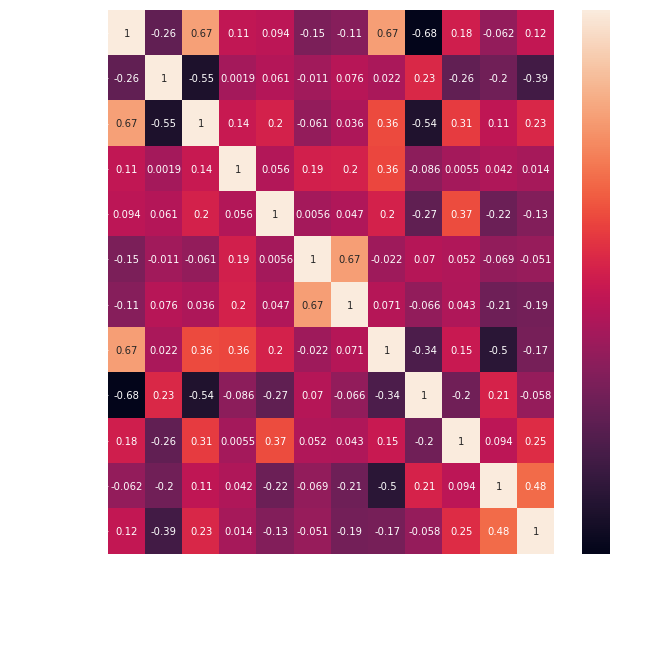

In [17]:
# Create a correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data_red.corr(), annot=True)

In [18]:
# Create a contingency/crosstab table for pH range and quality
data_crosstab = pd.crosstab(data_red['pH range'], data_red['quality'])
print(data_crosstab)

quality           3   4    5    6    7   8
pH range                                  
acidic            0   1   13   10    3   2
ideal red         7  36  331  348   91   5
too high          1   5   20   23    5   1
white wine range  2  11  317  257  100  10


In [19]:
# Perform chi-squared test
# H0: Variables are independent (no relationship)
# H1: Variables are dependent
stat, p, dof, expected = chi2_contingency(data_crosstab)

alpha = 0.05 # Rejection value
print('p value is' + str(p))
if p <= alpha:
    print('Variables are dependent (reject H0)')
else:
    print('Variables are independent (do not reject H0)')

p value is0.0005657435175477239
Variables are dependent (reject H0)
